In [ ]:
import tensorflow
from tensorflow import keras
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()


Dados do dataset

---



In [ ]:
print(identificacoes_treino.min(), identificacoes_treino.max())

0 9


Visualizar Imagens

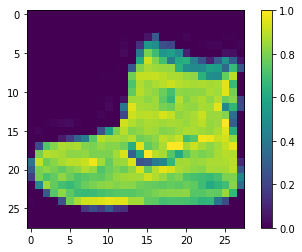

In [12]:
import matplotlib.pyplot as plt
plt.imshow(imagens_treino[0])
plt.colorbar()

Mostrar identificação da imagens

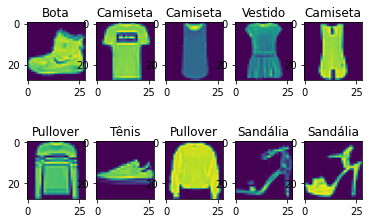

In [ ]:
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']
for imagem in range(10):
  plt.subplot(2, 5, imagem + 1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

Criando o modelo

In [ ]:
#Diminuir perda com graduação entre 0 e 1 (Normalização)
imagens_treino = imagens_treino / 255.0
modelo = keras.Sequential([
                           # Achatamento para uma única dimensão (Camada 0)
                           keras.layers.Flatten(input_shape=(28,28)),

                           # Camada densa, interessante sempre colocar múltiplo de 2 (Camada 1)
                           keras.layers.Dense(256, activation=tensorflow.nn.relu),

                           keras.layers.Dropout(0.2),

                           # Capta mais que somente o contorno
                           #keras.layers.Dense(128, activation=tensorflow.nn.relu),

                           # Capta mais que somente o contorno
                           #keras.layers.Dense(64, activation=tensorflow.nn.relu),

                           #Saída (Camada 2)
                           keras.layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])

modelo.compile(optimizer='adam',
 #Entropia categorica cruzada esparsa
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5363 - accuracy: 0.8121 - val_loss: 0.4373 - val_accuracy: 0.8422
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3983 - accuracy: 0.8545 - val_loss: 0.3718 - val_accuracy: 0.8647
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3628 - accuracy: 0.8674 - val_loss: 0.3467 - val_accuracy: 0.8708
Epoch 4/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3409 - accuracy: 0.8744 - val_loss: 0.3525 - val_accuracy: 0.8716
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3232 - accuracy: 0.8813 - val_loss: 0.3672 - val_accuracy: 0.8663


Resumo do modelo

In [ ]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Zerar camadas

In [ ]:
import numpy as np
pesos_camada_dense_zerados = np.zeros(modelo.layers[1].get_weights()[0].shape)
modelo.layers[1].set_weights([pesos_camada_dense_zerados, 
                              modelo.layers[1].get_weights()[1]])

Treinar o novo modelo com os pesos zerados

Alimentando pesos com valores aleatórios

In [ ]:
import numpy as np
#s = [i for i in modelo.layers[1].get_weights()[0].shape]
#s
pesos_camada_dense_aleatorios = np.random.rand(784, 256)
modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, 
                              modelo.layers[1].get_weights()[1]])

NameError: ignored

Treinar modelo com novos vieses

In [ ]:
vieses_camada_dense_zerados = np.zeros(modelo.layers[1].get_weights()[1].shape)
modelo.layers[1].set_weights([pesos_camada_dense_zerados, vieses_camada_dense_zerados])

Treinar novamente o modelo

In [ ]:
modelo.compile(optimizer='adam',
 #Entropia categorica cruzada esparsa
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)
modelo.get_config()

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5415 - accuracy: 0.8067 - val_loss: 0.4154 - val_accuracy: 0.8447
Epoch 2/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4107 - accuracy: 0.8486 - val_loss: 0.3804 - val_accuracy: 0.8577
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3745 - accuracy: 0.8626 - val_loss: 0.3591 - val_accuracy: 0.8652
Epoch 4/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3559 - accuracy: 0.8702 - val_loss: 0.3825 - val_accuracy: 0.8633
Epoch 5/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3363 - accuracy: 0.8745 - val_loss: 0.3471 - val_accuracy: 0.8729


{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'name': 'flatten_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Flatten',
   'config': {'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'flatten',
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 256,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout',
    'noise_shape': None,
    'rate': 0.2,
    'seed': None

Alterando hyperparâmetros do otimizador Adam

In [ ]:
adam = keras.optimizers.Adam(learning_rate=0.002)

callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss'),
             keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5',
                                             monitor='val_loss',
                                             save_best_only=True,
                                             )]

modelo.compile(optimizer=adam,
 #Entropia categorica cruzada esparsa
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])
historico = modelo.fit(imagens_treino, 
                       identificacoes_treino, 
                       batch_size=150,
                       epochs=5, 
                       validation_split=0.2,
                       callbacks=callbacks)

320/320 [==============================] - 3s 7ms/step - loss: 2.3113 - accuracy: 0.0999 - val_loss: 2.3168 - val_accuracy: 0.1006


Salvar o modelo para futuro load

In [ ]:
from tensorflow.keras.models import load_model

nome_arquivo = 'modelo.h5'
modelo.save(nome_arquivo)
modelo_salvo = load_model(nome_arquivo)

Analise de melhoria da acurácia do treino

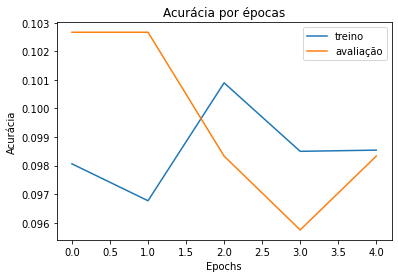

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Epochs')
plt.ylabel('Acurácia')
plt.yscale('linear')
plt.legend(['treino', 'avaliação'])

Perda de treino

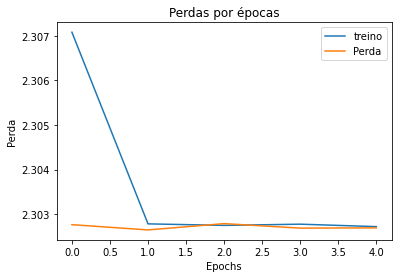

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por épocas')
plt.xlabel('Epochs')
plt.ylabel('Perda')
plt.yscale('linear')
plt.legend(['treino', 'Perda'])

Testes

In [ ]:
import numpy as np
testes = modelo.predict(imagens_teste)
print('Resultado do teste: ' , np.argmax(testes[1]))
print('número de imagens: ', identificacoes_teste[1])

'''
testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado do testes do modelo salvo: ', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste: ', identificacoes_teste[1])
'''

Resultado do teste:  2
número de imagens:  2


"\ntestes_modelo_salvo = modelo_salvo.predict(imagens_teste)\nprint('resultado do testes do modelo salvo: ', np.argmax(testes_modelo_salvo[1]))\nprint('número da imagem de teste: ', identificacoes_teste[1])\n"

Validação

In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda teste: ' , perda_teste)
print('Acuracia do teste: ', acuracia_teste)

313/313 [==============================] - 0s 1ms/step - loss: 467.7064 - accuracy: 0.7774
Perda teste:  467.70635986328125
Acuracia do teste:  0.777400016784668
